### Guilherme Michel Lima de Carvalho 11175052


### Asrat Mekonnen Belachew 11415730


### Project 3: Network models

## Question 1 
Comparison of network models
- Generate 30 networks according to the models: Erdös-Rényi, Watts-Strogatz ($p=0.01$ and $p=0.1$) e Barabási-Albert. 
- Consider $N = 1000$ and $<k> = 10$.
    
- In table, include the mean and standard deviation of the following measures: 
    - (i) number o nodes 
    - (ii) average degree
    - (iii) second moment of degree distribution 
    - (iv) average shortest path length 
    - (v) average clustering coefficient
    - (vi) transitivity
    - (vii) assortativity coefficient 
    
- Show the degree distributions of the ER, WS and BA networks
- Discuss the main differences and similarities between the models.

Importing the libraries

In [1]:
import networkx as nx
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pdb

### Erdos-Rényi Model

Its the first theoretical model of random network, proposed by Erdos and Reyni in the early 1960s. In the original formulation, the undirected graph $G_{N,E}$ is construted starting from a set of $N$ different vertices, which are joined by $E$ edges whose ends are selected at random from among the $N$ vertices[4]. So, the total of different possible graphs is:

$${\frac{N(N-1)}{2}\choose E}$$

A variation of this model is the graph $G_{N,p}$, construted from a set of $N$ different vertices in which each of the $N(N-1)/2$ possible edges is present with probability $p$ and absent with probability $1-p$.

The relation between both constructions, is the following: In the last case the probability of obtaining a given graph with $N$ vertices and $E$ edges is:

$$ P(G_{N,E}) = p^{E}(1-p)^{1/2(N(N-1)) -E}$$

Considering the ER graph $G_{N,p}$, defined by the connection probability $p$, the construction of a random network we follow these steps, Ref [2]: 

- Start with N isolated nodes.
- Select a node pair and generate a random number between $0$ and $1$. If the number exceeds $p$, connect the selected node pair with a link, otherwise leave them disconnected.
- Repeat step (2) for each of the $N(N-1)/2$ node pairs.



**Number of Links**


Each random network generated with the same parameters $N$, $p$ looks slightly different. Not only the detailed wiring diagram changes between realizations, but so does the number of links $E$. It is useful, therefore, to determine how many links we expect for a particular realization of a random network with fixed $N$ and $p$, Ref [2].

The probability that a random network has exactly $E$ is given by:

$$ p_{E} = {\frac{N(N-1)}{2}\choose E}p^{E}(1-p)^{\frac{1}{2}(N(N-1)) -E}$$

So, the expected number of edges $E$ generate in the construction of the graph is:

$$ \langle E \rangle = \sum_{E=0}^{\frac{1}{2}N(N-1)}E p_E = \frac{1}{2}N(N-1)p$$ 

So, each edge contributes to the degree of two vertices, therefore, the expected number of average degree is given by:

$$ \langle k \rangle = \frac{2 \langle E \rangle}{N} = (N-1)p $$

**Degree distribution**

Now, if we want to obtain the degree distribution $P(k)$, we notice that, in a graph with wiring probability $p$, the probability to create a vertex of degree $k$ is equal to the probability that it is connected to $k$ other vertices and not connected to the reamining $N-1-k$ vertices. Since the establishiment of each edge is an independent event, this probability is given by the binomial distribution, Ref [4]:

$$ P(k) = {N-1 \choose k}p^{k}(1-p)^{N-1-k}$$

In the limite of large $N$ and for $pN = \langle k \rangle$ constant, the binomial distribution can be approximated by the Poisson Distribution:

$$ P(k) = e^{\langle k \rangle}\frac{\langle k \rangle^k}{k!}$$

**Clustering coefficient**

If we want the clustering coefficient $\langle c \rangle$ of the Erdos-Renyi, for any vertex, the probability that any two of its neighbors are also connected to each other is given by the connection probability $p$. So, the clustering coefficient is:

$$ \langle C \rangle = p = \frac{\langle k \rangle}{N-1} $$ 

Observing the last equation, its possible to conclude that the clustering coefficient of ER model,at fixed $\langle k \rangle$, decreases with the graph size, tending to zero in the limit of large network.

**Average shortest path length**:

The average shortest path length is approximate by:
$$ \langle \ell \rangle \approx \frac{log(N)}{log(\langle k \rangle)}$$

## Generation of 30 networks using Erdos-Renyi model

In [56]:
## Choosing N=1000 and the average degree = 10
N = 1000
av_degree = 10
p_ER = av_degree/(N-1)

In [57]:
## Creating a list for save the ER networks
ER_Nets = [None]*30

In [58]:
## 30 ER networks
for i in range(30):
    ER_Nets[i] = nx.gnp_random_graph(N, p_ER, seed=None, directed=False)

## Watts-Strogatz model

In the case of generalized random graphs model, the clustering coefficient is implicitly determined by the imposed degree distribution, and it vanishing in the case of very large graphs. The empirical observation of a very large and stationary clustering coefficient in many real networks makes it extremely intersting to find a graph construction in which it it possible to tune $\langle c \rangle$ to any desired value. Many real social networks are high clustered and exhibid a small average distance between vertices. Take into consideration that fact, Watts and Strogatz proposed a model that interpolates between ordered lattices(which have large clustering) and purely random networks, which possess a small average path length, Ref[4].

**Model construction**:
The WS model starts with a ring of $N$ vertices in which each vertex is symmetrically connected to its $2m$ nearest neighbors($m$ on the clockwise and $m$ in the counterclockwise). Then, for every vertex, each edge connected to a clockwise neighbor is rewired with probability $p$, Ref [4]. Lets see a example:

In [23]:
N = 8 ## Number of nodes
m = 2 ## number of neighbors in one side
k = 2*m ## total number of neighbors
p = [0, 0.10, 0.2, 0.5, 0.7,1]  ## probability of rewired
WS_example = [None]*len(p)  ## A list for save the networks


In [25]:
for i in range(len(p)):
    WS_example[i] = nx.watts_strogatz_graph(N, k, p[i], seed=None)

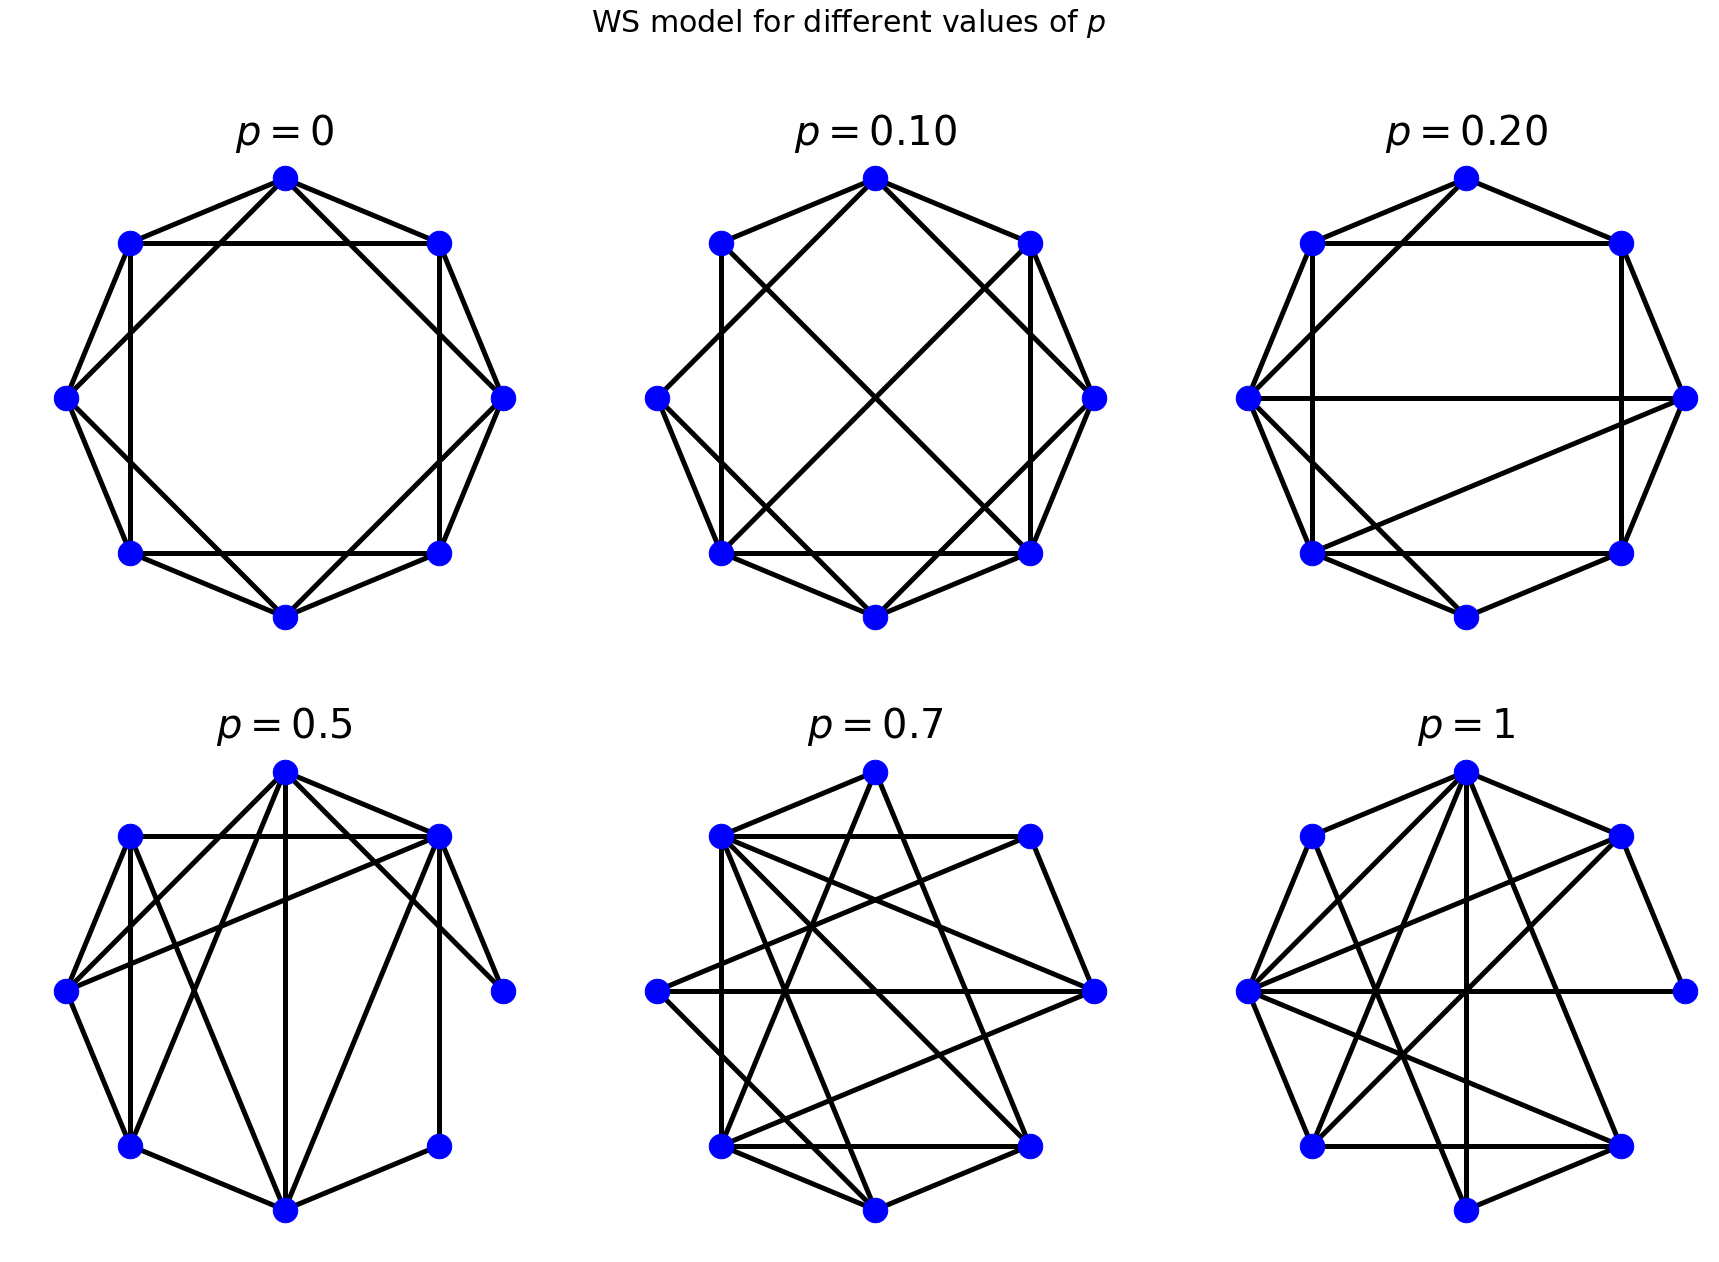

In [34]:
fig, axs = plt.subplots(2, 3,figsize=(30, 20))
ax = axs.flatten()

titles = ['$p=0$', '$p=0.10$', '$p=0.20$', '$p=0.5$', '$p=0.7$', '$p=1$']
fig.suptitle('WS model for different values of $p$', fontsize=30)

for i in range(len(WS_example)):
    pos=nx.circular_layout(WS_example[i]) 
    nx.draw_networkx(WS_example[i], with_labels = False,node_color='blue',edge_color='black', 
        node_size=600, font_size=16,  width=5,pos = pos, ax=ax[i])
    ax[i].set_axis_off()
    ax[i].set_title(titles[i], fontsize=40)

In the WS model, for every vertex, each edge connected to a clockwise neighbor is rewired with probability p, and preserved with probability $1-p$. The rewing connects the edge endpoint to a randomly chosen vertex, avoiding self-connections. The parameter $p$ therefore tunes the level of randomness present in graph, keeping the number of edges constant. With this construction, after the rewiring processes, a graph with average degree $\langle k \rangle = 2m$ is obtained.

**Degree distribution of WS**: The degree distribution of WS model can be computed analytically Ref. [4]:

$$ P(k) = \sum_{n=0}^{min(k-m,m)} {m \choose n}(1-p)^{n}p^{m-n}\frac{(pm)^{k-m-n}}{(k-m-n)!}e^{-pm}$$

In the limit of $p \rightarrow 1$ the expression reduces to:

$$ P(k) = \frac{m^{k-m}}{(k-m)!}e^{-m}$$ 

It's a Poisson distribution for the variable $k'= k-m$, with average value $\langle k' \rangle = m$


**Clustering coefficient**: 

$$ \langle C(p) \rangle \approx \frac{3(m-1)}{2(2m-1)}(1-p)^3 $$ 

## Generation of 30 networks using Watts-Strogatz model

## p = 0.01 first

In [60]:
N = 1000 ## Number of nodes
m = 5 ## number of neighbors in one side
k = 2*m ## total number of neighbors

p1 = 0.01 #probability of rewiring
WS_Nets1 = [None]*30

for i in range(30):
    WS_Nets1[i] = nx.watts_strogatz_graph(N, k, p1, seed=None)

## Now p = 0.1

In [38]:
p2 = 0.1
WS_Nets2 = [None]*30
for i in range(30):
    WS_Nets2[i] = nx.watts_strogatz_graph(N, k, p2, seed=None)

## Barabási-Albert model

The dynamical approach to networks is exemplified by the Barabási-Albert class of models which provides an example of the emergence of networks with heavy-tailed degree distributions in terms of elementary process governing the wiring of new vertices joining in the network,Ref [5]. The insight behind this approach is in the fact that in most real networks, new edges are not located at random, but tend to connect to vertices which already have a large number of connections, this is commom in real social networks. So, Barabási-Albert (1999) have combined the preferential attachment condition with the growing nature of many networks by defining a simple model based on the following rules: 

- **Growth** : The network starts with a small core of $m_0$ connected vertices. At every time step we add a new vertex, with $m$ edges ($m<m_0$) connected to old vertices in the system.

- **Preferential attachment**: Each new edge is connected to the old sth vertex with a probability proportional to its degree $k_s$.

These rules are used to define a class of dynamical algorithms that, starting from a connected initial core, generates graphs with fixed average degree $\langle k \rangle = 2m$ (Barabási-Albert 2001). 

In addition the probability $\prod(k_i(t))$ that link of the new node connectes to node $i$ depends on the degree $k_i$ as , Ref [2]:

$$\prod(k_i(t)) = \frac{k_i(t)}{\sum_{j}k_j(t)}$$

Where the denominator is the required normalization factor, the sum of all the degrees of the vertices in the network. Since each new vertice contributes with a factor 2 to the total degree, and at time $t$ we have added $tm$ the evolution of $k_i(t)$ is given by:

$$\frac{\delta k_i(t)}{\delta t} =  \frac{m k_i(t)}{2mt + m_0 \langle k \rangle_0}$$

where $\langle k \rangle_0$ is the average connectivity of the initial core of $m_0$ vertices. This differential equation with the boundary condition $k_i(i) = m$ can be solved in the limit of large networks, for more details see Ref [5].

**Degree distribution**: The degree distribution of the Barabási-Albert model in the limit of large $t$ is:

$$P(k) = 2m^2k^{-3}$$

**Average clustering coefficient**:
The average clustering coefficient for BA networks is given by:

$$\langle C \rangle_N = \frac{m}{8N}(ln(N))^2$$

**Average shortest path length**:

$$\langle \ell \rangle \approx \frac{log(N)}{log(log(N))}$$



## Generation of 30 networks using Barabasi-Albert model

In [51]:
N = 1000
m = int(av_degree/2)
BA_Nets = [None]*30

for i in range(30):
    BA_Nets[i] = nx.barabasi_albert_graph(N, m)



### Lets see a plot of one realization of each type of network

Text(0.5, 1.0, 'Watts-Strogatz($p=0.1$)')

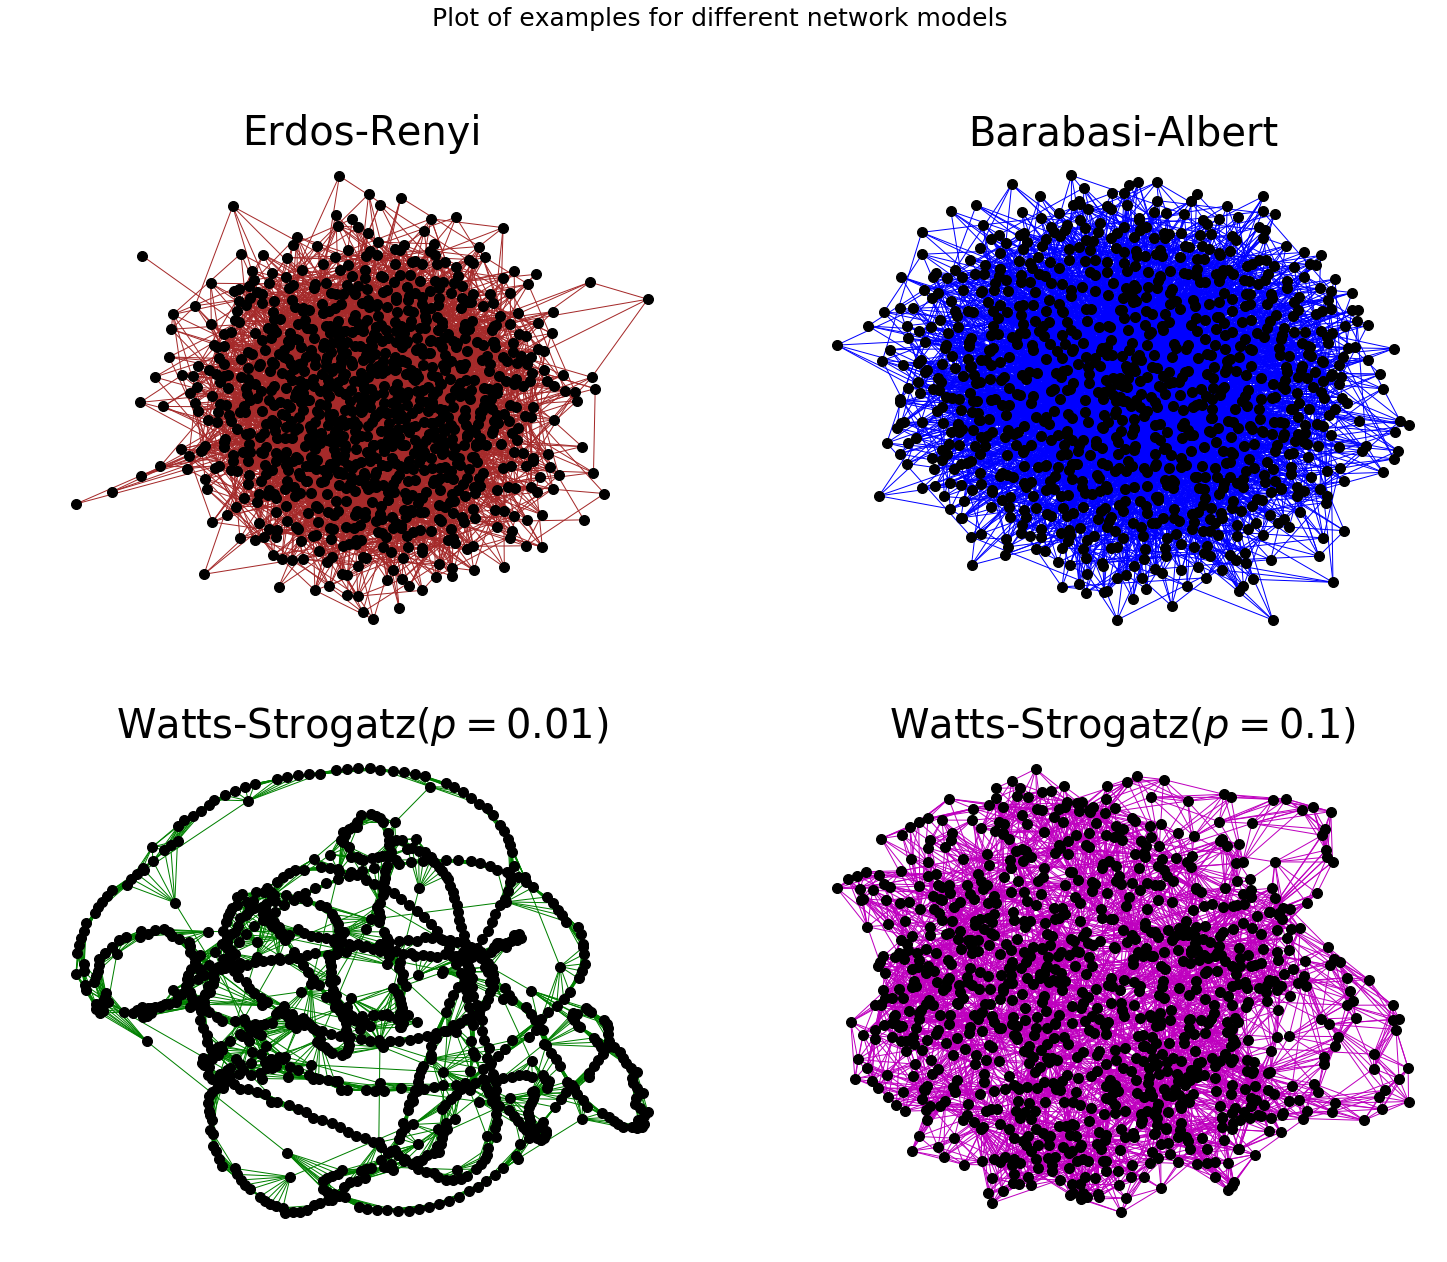

In [40]:
fig, axs = plt.subplots(2, 2,figsize=(25, 20))
ax = axs.flatten()

titles = ['Erdos-Renyi', 'Watts-Strogatz($p=0.01$)', 'Watts-Strogatz($p=0.1$)', 'Barabasi-Albert']

fig.suptitle('Plot of examples for different network models', fontsize=25)

pos1=nx.spring_layout(ER_Nets[0])
nx.draw_networkx(ER_Nets[0], with_labels = False, node_color='black', edge_color='brown', node_size=100, font_size=16,  width=1,pos = pos1, ax=ax[0])
ax[0].set_axis_off()
ax[0].set_title(titles[0], fontsize=40)

pos4=nx.spring_layout(BA_Nets[0])
nx.draw_networkx(BA_Nets[0] , with_labels = False, node_color='black', edge_color='blue', node_size=100, font_size=16,  width=1,pos = pos4, ax=ax[1])
ax[1].set_axis_off()
ax[1].set_title(titles[3], fontsize=40)


pos2=nx.spring_layout(WS_Nets1[0])
nx.draw_networkx(WS_Nets1[0], with_labels = False, node_color='black', edge_color='green', node_size=100, font_size=16,  width=1,pos = pos2, ax=ax[2])
ax[2].set_axis_off()
ax[2].set_title(titles[1], fontsize=40)

pos3=nx.spring_layout(WS_Nets2[0])
nx.draw_networkx(WS_Nets2[0], with_labels = False, node_color='black', edge_color='m', node_size=100, font_size=16,  width=1,pos = pos3, ax=ax[3])
ax[3].set_axis_off()
ax[3].set_title(titles[2], fontsize=40)




### Let us define a function to calculate the mean and standard deviation of the following measures of the 30 generated networks for each model:
    
    (i) number o nodes
    (ii) average degree
    (iii) second moment of degree distribution
    (iv) average shortest path length
    (v) average clustering coefficient
    (vi) transitivity
    (vii) assortativity coefficient

In [6]:
import statistics as st

In [36]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk


In [36]:
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

In [38]:
## This function receives a list of networks and return a vector contains the mean of some measures 
## and the standard deviation
def measures_vector_func(G):    
    num_nodes = np.zeros(len(G))
    av_degree = np.zeros(len(G))
    sec_moment = np.zeros(len(G))
    av_short_path = np.zeros(len(G))
    av_clust_coeff = np.zeros(len(G))
    transitivity = np.zeros(len(G))
    assor_coeff = np.zeros(len(G))
    
    for i in range(len(G)):
        num_nodes[i] = len(G[i].nodes())
        av_degree[i] = st.mean(list(dict(G[i].degree()).values()))
        sec_moment[i] = momment_of_degree_distribution(G[i],2)
        av_short_path[i] = nx.average_shortest_path_length(G[i])
        av_clust_coeff[i] = nx.average_clustering(G[i])
        transitivity[i] = nx.transitivity(G[i])
        assor_coeff[i] = nx.degree_assortativity_coefficient(G[i])
        
    mean_num_nodes = st.mean(num_nodes)
    mean_av_degree = st.mean(av_degree)
    mean_sec_moment = st.mean(sec_moment)
    mean_av_short_path = st.mean(av_short_path)
    mean_av_clust_coeff = st.mean(av_clust_coeff)
    mean_transitivity = st.mean(transitivity)
    mean_assor_coeff = st.mean(assor_coeff)
    
    
    sd_num_nodes = st.stdev(num_nodes)
    sd_av_degree = st.stdev(av_degree)
    sd_sec_moment = st.stdev(sec_moment)
    sd_av_short_path = st.stdev(av_short_path)
    sd_av_clust_coeff = st.stdev(av_clust_coeff)
    sd_transitivity = st.stdev(transitivity)
    sd_assor_coeff = st.stdev(assor_coeff)
    
    vector_measures_mean = [mean_num_nodes, mean_av_degree, mean_sec_moment, mean_av_short_path, mean_av_clust_coeff,mean_transitivity, mean_assor_coeff]
    vector_measures_sd = [sd_num_nodes,sd_av_degree,sd_sec_moment,sd_av_short_path,sd_av_clust_coeff,sd_transitivity,sd_assor_coeff]
    return vector_measures_mean, vector_measures_sd
        

Let us define a function to consider only the giant component of the network

In [8]:
def giant_comp(G):
    Sub=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
    G=Sub[0]
    return G

Now using this function for every random network

In [46]:
for i in range(30):
    ER_Nets[i] = giant_comp(ER_Nets[i])
    BA_Nets[i] = giant_comp(BA_Nets[i])
    WS_Nets1[i] = giant_comp(WS_Nets1[i])
    WS_Nets2[i] = giant_comp(WS_Nets2[i])

In [47]:
measures_ER,sd_ER = measures_vector_func(ER_Nets)
measure_BA, sd_ba = measures_vector_func(BA_Nets)
measures_WS1, sd_ws1 = measures_vector_func(WS_Nets1)
measures_WS2, sd_ws2 = measures_vector_func(WS_Nets2)

In [48]:
df = pd.DataFrame(columns=['Model','N','Mean degree', 'Second Moment', 'Ave Shor Path', 'Av. Clus Coeff', 'Transitivity', 'Assortativity'])

In [49]:
df.loc[1] = ['ER'] + (measures_ER)
df.loc[2] = ['BA'] + (measure_BA)
df.loc[3] = ['WS1'] + (measures_WS1)
df.loc[4] = ['WS2'] + (measures_WS2)

In [50]:
df.style

,Model,N,Mean degree,Second Moment,Ave Shor Path,Av. Clus Coeff,Transitivity,Assortativity
1,ER,1000,9.99987,109.789,3.25683,0.0100142,0.0100069,-0.00199175
2,BA,1000,9.95,204.134,2.9794,0.0401502,0.0300631,-0.0550547
3,WS1,1000,10,100.098,8.99383,0.648255,0.646987,0.00145364
4,WS2,1000,10,100.955,4.43366,0.490123,0.481127,-0.0109834


**Discussion**: We note for all the networks the assortativity is approximately zero. However, the BA networks presents higher negative value for assortativity. The WS networks with $p=0.01$ presents the higher average shortest path and average clustering coefficient and transitivity.

Now a dataframe for the standard deviations

In [56]:
df_sd = pd.DataFrame(columns=['Model','N(sd)','Mean degree(sd)', 'Second Moment(sd)', 'Ave Shor Path(sd)', 'Av. Clus Coeff(sd)', 'Transitivity(sd)', 'Assortativity(sd)'])

In [59]:
df_sd.loc[1] = ['ER'] + (sd_ER)
df_sd.loc[2] = ['BA'] + (sd_ba)
df_sd.loc[3] = ['WS1'] + (sd_ws1)
df_sd.loc[4] = ['WS2'] + (sd_ws2)

In [60]:
df_sd.style

,Model,N(sd),Mean degree(sd),Second Moment(sd),Ave Shor Path(sd),Av. Clus Coeff(sd),Transitivity(sd),Assortativity(sd)
1,ER,0,0.132629,2.87252,0.0176521,0.000943187,0.000867929,0.0137032
2,BA,0,0,7.37072,0.0161598,0.0032714,0.00129321,0.00810537
3,WS1,0,0,0.0133027,0.494768,0.0023682,0.0024855,0.0165372
4,WS2,0,0,0.0565578,0.0395248,0.00627311,0.00663319,0.0127172


Here we note only the ER networks show a standard deviation for mean degree

## Show the degree distributions of the ER, WS and BA networks

**ER Network**

In [51]:
grau_er, prob_er = degree_distribution(ER_Nets[0])

**BA Networks**

In [85]:
grau_ba, prob_ba = degree_distribution(BA_Nets[1])

**WS networks ($p=0.01$)**

In [53]:
grau_ws1, prob_ws1 = degree_distribution(WS_Nets1[0])

**WS networks ($p=0.1$)**

In [54]:
grau_ws2, prob_ws2 = degree_distribution(WS_Nets2[0])

### Let's plot the degree distributions

C:\Users\Gulherme\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


Text(0.5, 1.0, 'Degree distribution for WS($p=0.1$)')

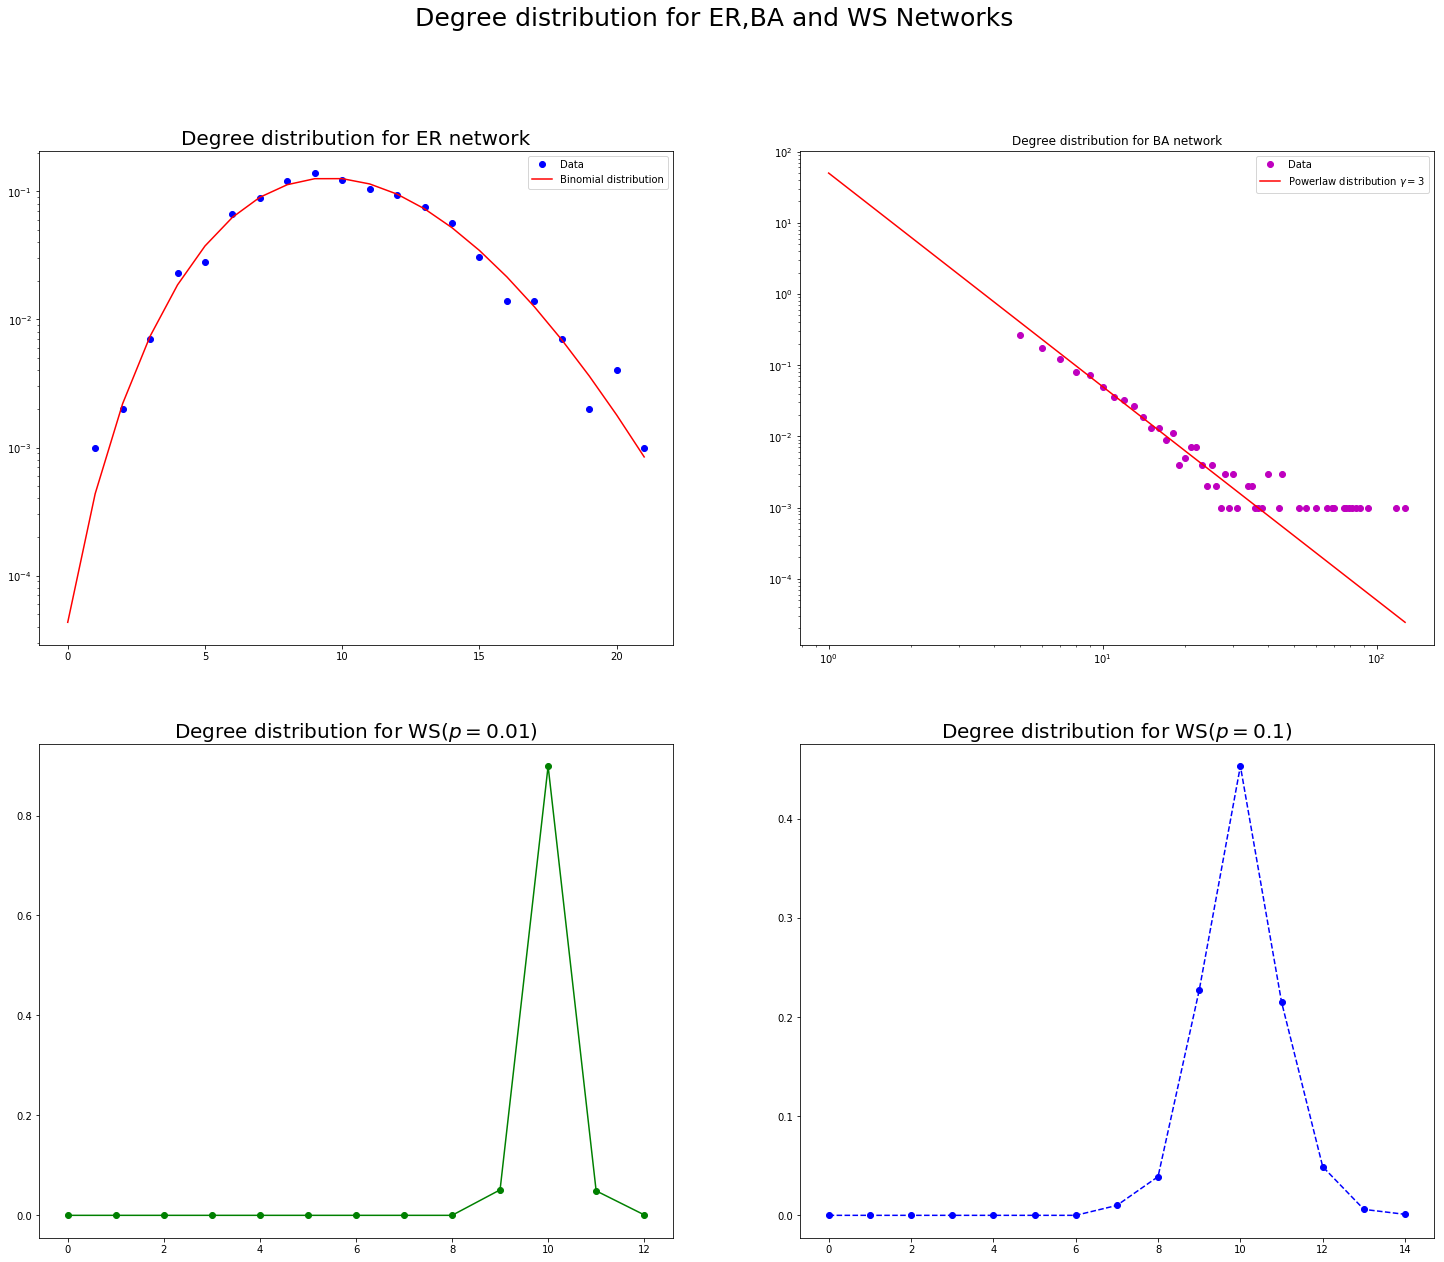

In [116]:
from scipy.stats import binom

N = 1000
av_degree = 10
p_ER = av_degree/(N-1)


##Binomial fit for ER
pk = binom.pmf(grau_er, N-1, p_ER)

##Fitiing the power law for BA network
m = int(av_degree/2)
p_k = (2*m**2)*(1/(grau_ba**3))
  

## The plots
fig, axs = plt.subplots(2, 2,figsize=(25, 20))
fig.suptitle('Degree distribution for ER,BA and WS Networks', fontsize=25)


axs[0,0].plot(grau_er,prob_er,'bo', label='Data')
axs[0,0].plot(grau_er,pk, 'r', label='Binomial distribution')
axs[0,0].set_title('Degree distribution for ER network', fontsize=20)
axs[0,0].set_yscale('log')
axs[0,0].legend()


axs[0,1].plot(grau_ba,prob_ba,'mo', label='Data')
axs[0,1].set_title('Degree distribution for BA network')
axs[0,1].plot(grau_ba,p_k, 'r', label='Powerlaw distribution $\gamma = 3$')
axs[0,1].set_yscale('log')
axs[0,1].set_xscale('log')
axs[0,1].legend()


axs[1,0].plot(grau_ws1,prob_ws1,'-go')
axs[1,0].set_title('Degree distribution for WS($p=0.01$)', fontsize=20)



axs[1,1].plot(grau_ws2,prob_ws2,'--bo')
axs[1,1].set_title('Degree distribution for WS($p=0.1$)', fontsize=20)


**Discussion about the degree distributions**:
We note, as expected the distribution for ER network follows a binomial distribution and the distribution for the BA network follows a powerlaw with $\gamma=3$. The distribution of WS networks is more complicated and was showed before, but it is remarkable that distribution becomes less concentrated for greater values of $p$.

## Question 2

Erdös-Rényi network model 

- For the model $ER(N,p)$, obtain the phase transition curve
- Verify the small-world property by plotting the average shortest path length and diameter in terms of the number of nodes:

$$ d_{max} = \frac{log(N)}{log(\langle k \rangle)}$$

- Consider $\langle k \rangle = 4$, $10$, $20$ and $30$ and $N$ from $100$ to $1000$ in steps of $100$.

### Phase transition for Erdos-Renyi model

- In ER model if $p=0$ we have $N$ nodes disconnected, so the network have $N$ components
- If $p=1$, we have only one component.

Lets see this in a plot for a small number of nodes.


In [135]:
## Choosing N=1000 and the average degree = 10
N = 50
ER1 = nx.gnp_random_graph(N, 0)
ER2 = nx.gnp_random_graph(N,1)

Text(0.5, 1.0, 'Erdos-Renyi(p=0)')

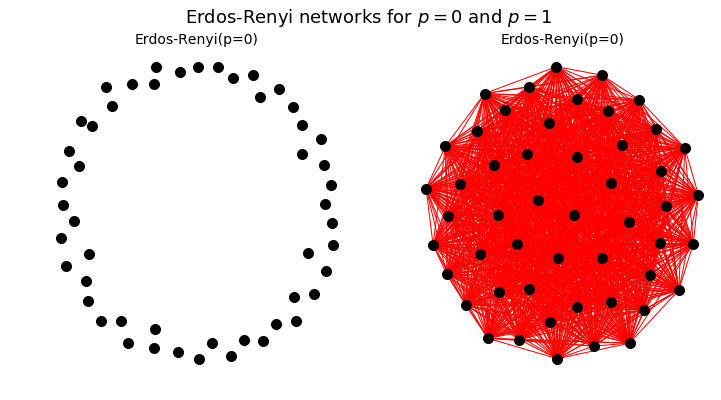

In [156]:
fig, axs = plt.subplots(1, 2,figsize=(12,6))
ax = axs.flatten()

titles = ['Erdos-Renyi(p=0)','Erdos-Renyi(p=0)']
fig.suptitle('Erdos-Renyi networks for $p=0$ and $p=1$', fontsize=18)

pos1=nx.spring_layout(ER1)
nx.draw_networkx(ER1, with_labels = False, node_color='black', edge_color='brown', node_size=100, font_size=16,  width=1,pos = pos1, ax=ax[0])
ax[0].set_axis_off()
ax[0].set_title(titles[0], fontsize=14)

pos4=nx.spring_layout(ER2)
nx.draw_networkx(ER2 , with_labels = False, node_color='black', edge_color='red', node_size=100, font_size=16,  width=1,pos = pos4, ax=ax[1])
ax[1].set_axis_off()
ax[1].set_title(titles[1], fontsize=14)

So here a good question is: What is the behavior of the largest component in the intermediary regime $0<p<1$?

- Define $u = 1 - \frac{N_G}{N}$ Where $N_G$ is the number of nodes of the giant component and $N$ is the number of nodes. So, $u$ is the fraction of nodes that are not in the giant component.

- If node $i$ is parte of the giant component, it must link to another j, which must also be part of giant component.

- If the node $i$ is not part of the giant component, there is a link between $i$ and $j$, but $j$ is not part of the giant component, the probability here is $pu$. Or the node $i$ dont have any connection, this happen with probability $(1-p)$. So, the total probaility that $i$ is not part of the giant component via node $j$ is $(1-p + pu)$.

- The probability that node $i$ is not linked to the giant component via any other node is $(1-p-pu)^{N-1}$. So we have the following equation:

$$u=(1-p+pu)^{N-1}$$ 

- The size of giant component is given by $N_G = N(1-u)$

- Using $p = \frac{\langle k \rangle}{N-1}$ and taking the logarithm:

$$ ln(u) = (N-1)ln\left(1-\frac{\langle k \rangle}{N-1}(1-u)\right) \approx -\langle k \rangle (1-u)$$ 

- And using the series expansion and approximate its possible to get:

$$ u = exp[-\langle k \rangle(1-u)] $$

- Using $S= 1-u$, 

$$S = 1 - e^{\langle k \rangle S}$$

The last equation dont have simple solution. Using $\frac{d}{dS}(1-e^{\langle k \rangle S})=1$ we get:

$$\langle k \rangle e^{-\langle k \rangle S} = 1$$

- Setting $S=0$, we obtain the phase transition point at $\langle k \rangle = 1$


### The phase transition curve

Now let's plot the phase transition curve for ER networks

In [157]:
k = np.linspace(0,5,20) 

In [118]:
w, h = 30, len(k);
ER_phase = [[0 for x in range(w)] for y in range(h)] 

In [119]:
N = 1000

In [120]:
p_ER = np.zeros(len(k))
for i in range(len(k)):
    p_ER[i] = k[i]/(N-1)

In [121]:
for i in range(len(ER_phase)):
    for j in range(len(ER_phase[0])):
        ER_phase[i][j] = nx.gnp_random_graph(N, p_ER[i])

Now a function for calculating the fraction between the number of nodes of giant component and the total number of nodes, in this case, N=1000

In [122]:
def compute_frac(G,N):
    aux = giant_comp(G)
    nG = len(aux.nodes())
    return nG/N

Defining a lists of lists for save the ratio between giant comp and total number of nodes for diferent networks

In [123]:
w, h = 30, len(k);
S = [[0 for x in range(w)] for y in range(h)] 

In [124]:
for i in range(len(ER_phase)):
    for j in range(len(ER_phase[0])):
        S[i][j] = compute_frac(ER_phase[i][j],1000)

Now let's save the mean of each list 

In [125]:
Average_size = np.zeros(len(k))

In [126]:
for i in range(len(S)):
    Average_size[i] = mean(S[i])

Now lets see a plot for phase transition of ER networks with a vertical line in $\langle k \rangle$ = 1

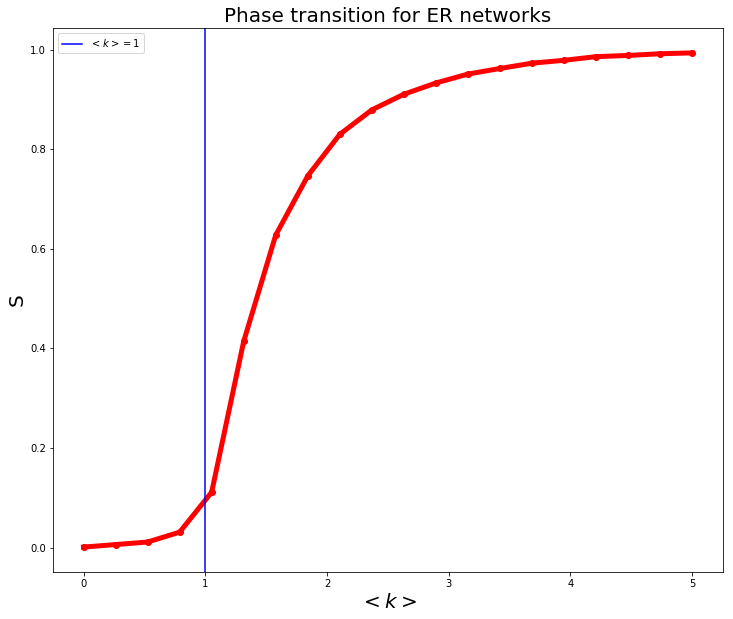

In [133]:
plt.figure(figsize=(12,10))
plt.plot(k,Average_size,'-ro',linewidth=5)
plt.title('Phase transition for ER networks',fontsize=20)
plt.xlabel('$<k>$', fontsize=20)
plt.ylabel('S', fontsize=20)
plt.axvline(1, color = 'b', label='$<k> = 1$')
plt.legend()
plt.show(True)

### Verifying the small-world property

In [3]:
k = [4,10,20,30]
N_step = np.linspace(10,1000,10)

In [4]:
## Creating lists for save the networks with different values of k

w, h = 10, len(N_step);
ER_4 = [[0 for x in range(w)] for y in range(h)] 
ER_10 = [[0 for x in range(w)] for y in range(h)]
ER_20 = [[0 for x in range(w)] for y in range(h)]
ER_30 = [[0 for x in range(w)] for y in range(h)]


In [5]:
for i in range(len(N_step)):
    for j in range(10):
        ER_4[i][j] =  nx.gnp_random_graph(int(N_step[i]), 4/(N_step[i]-1))
        ER_10[i][j] =  nx.gnp_random_graph(int(N_step[i]),10/(N_step[i]-1))
        ER_20[i][j] =  nx.gnp_random_graph(int(N_step[i]), 20/(N_step[i]-1))
        ER_30[i][j] =  nx.gnp_random_graph(int(N_step[i]),30/(N_step[i]-1))

First, we have to use only the giant component of each network

In [9]:
for i in range(len(N_step)): 
    for j in range(10):
        ER_4[i][j] = giant_comp(ER_4[i][j])
        ER_10[i][j] = giant_comp(ER_10[i][j])
        ER_20[i][j] = giant_comp(ER_20[i][j])
        ER_30[i][j] = giant_comp(ER_30[i][j])

the average shortest path

In [13]:
w, h = 10, len(N_step);
av_4 = [[0 for x in range(w)] for y in range(h)] 
av_10 = [[0 for x in range(w)] for y in range(h)]
av_20 = [[0 for x in range(w)] for y in range(h)]
av_30 = [[0 for x in range(w)] for y in range(h)]


In [16]:
mean_av_4 = np.zeros(len(N_step))
mean_av_10 = np.zeros(len(N_step))
mean_av_20 = np.zeros(len(N_step))
mean_av_30 = np.zeros(len(N_step))

In [17]:
for i in range(len(N_step)):
    for j in range(10):
        av_4[i][j] = nx.average_shortest_path_length(ER_4[i][j])
        av_10[i][j] = nx.average_shortest_path_length(ER_10[i][j])
        av_20[i][j] = nx.average_shortest_path_length(ER_20[i][j])
        av_30[i][j] = nx.average_shortest_path_length(ER_30[i][j])

In [18]:
for i in range(10):
    mean_av_4[i]=mean(av_4[i])
    mean_av_10[i]=mean(av_10[i])
    mean_av_20[i]=mean(av_20[i])
    mean_av_30[i]=mean(av_30[i])

If the network have the small wolrd property, so: 

$\langle d\rangle \approx \frac{log(N)}{log(\langle k\rangle)}$


In [14]:
d4 = np.log(N_step)/np.log(4)
d10 = np.log(N_step)/np.log(10)
d20 = np.log(N_step)/np.log(20)
d30 = np.log(N_step)/np.log(30)

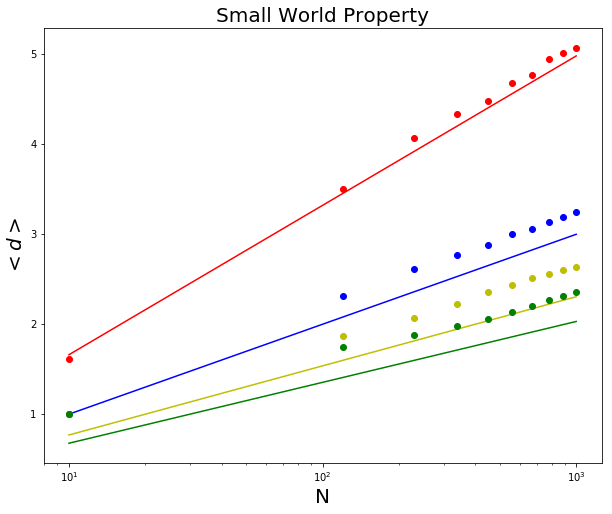

In [19]:
plt.figure(figsize=(10,8))
plt.title('Small World Property',fontsize=20)
plt.ylabel('$<d>$', fontsize=20)
plt.xlabel('N',fontsize=20)


plt.semilogx(N_step,mean_av_4,'ro')
plt.semilogx(N_step,d4, 'r-')


plt.semilogx(N_step,mean_av_10,'bo')
plt.semilogx(N_step,d10,'b')


plt.semilogx(N_step,mean_av_20,'yo')
plt.semilogx(N_step,d20,'y')


plt.semilogx(N_step,mean_av_30,'go')
plt.semilogx(N_step,d30,'g')

plt.show()

Here we observe these networks have the Small-world property, for more acuratte results we have to use more realizations of each network

## Question 3

### Watts-Strogatz model

- Generate small-world networks and get the plot

In [24]:
p = np.linspace(0.001,1,50)

Let us create a list of lists for save the small-world networks

In [32]:
w, h = 10, len(p);
WS_small = [[0 for x in range(w)] for y in range(h)] 

In [33]:
N = 500
av_degree = 15
k = int(av_degree)

Now creating the small-world networks, we create 10 networks for each probability $p$

In [34]:
for i in range(len(p)):
    for j in range(10):
        WS_small[i][j] = nx.watts_strogatz_graph(N, k, p[i], seed=None)

Creating a list of lists for save the clustering coefficient and average shortest path of each network

In [198]:
w, h = 10, len(p);
clustering_small = [[0 for x in range(w)] for y in range(h)] 
av_path_small =  [[0 for x in range(w)] for y in range(h)] 

In [199]:
for i in range(len(p)):
    for j in range(10):
        WS_small[i][j] = giant_comp(WS_small[i][j])
        clustering_small[i][j] =nx.transitivity(WS_small[i][j])
        av_path_small[i][j] = nx.average_shortest_path_length(WS_small[i][j])

Now let's calculate the mean of 10 networks realizations to plot

In [200]:
mean_clustering_small = np.zeros(len(p))
mean_av_path_small = np.zeros(len(p))

In [201]:
for i in range(len(p)):
    mean_clustering_small[i] = st.mean(clustering_small[i])
    mean_av_path_small[i] = st.mean(av_path_small[i])

In [202]:
l_max = np.max(mean_av_path_small)
C_max = np.max(mean_clustering_small)

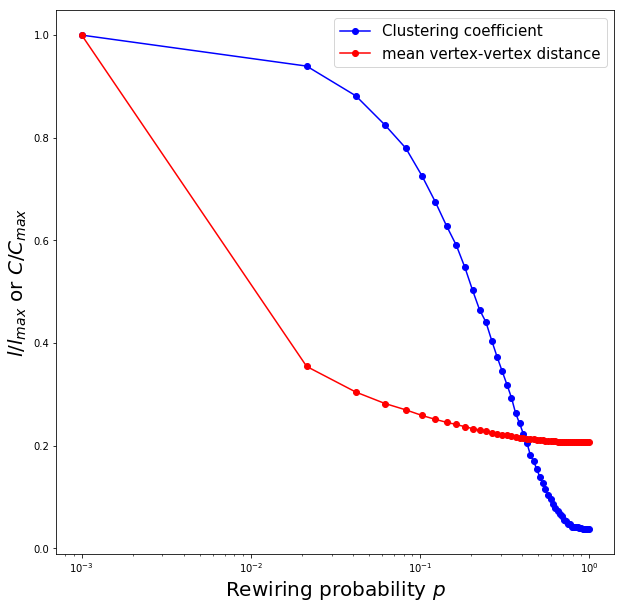

In [203]:
## Falta arrumar a escala aqui
plt.figure(figsize=(10,10))
## fig, ax = plt.subplots()
plt.ylabel('$l/l_{max}$ or $C/C_{max}$', fontsize=20)
plt.xlabel('Rewiring probability $p$',fontsize=20)
##plt.xscale('log')
## plt.yscale('log')
plt.semilogx(p,mean_clustering_small/C_max, 'bo-')
plt.semilogx(p,mean_av_path_small/l_max, 'ro-')

plt.legend(('Clustering coefficient','mean vertex-vertex distance'), loc='upper right',fontsize=15)
plt.show()

- Verify the variance of the degree distribution in terms of the parameter p, i.e., construct a plot of the second moment of degree distribution in terms of p.

In [27]:
def moment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

In [48]:
w, h = 10, len(p);
first_moments = [[0 for x in range(w)] for y in range(h)]
second_moments = [[0 for x in range(w)] for y in range(h)]


In [47]:
for i in range(len(p)):
    for j in range(10):
        second_moments[i][j] =moment_of_degree_distribution(WS_small[i][j],2)
        first_moments[i][j] = moment_of_degree_distribution(WS_small[i][j],1)
        

In [38]:
mean_first = np.zeros(len(first_moments))
mean_second = np.zeros(len(second_moments))

In [41]:
for i in range(len(p)):
    mean_first[i] = st.mean(first_moments[i])
    mean_second[i] = st.mean(second_moments[i])

In [83]:
for i in range(len(WS_small)):
    second_moments[i]=moment_of_degree_distribution(WS_small[i][9],2)
    first_moments[i]= moment_of_degree_distribution(WS_small[i][9],1)

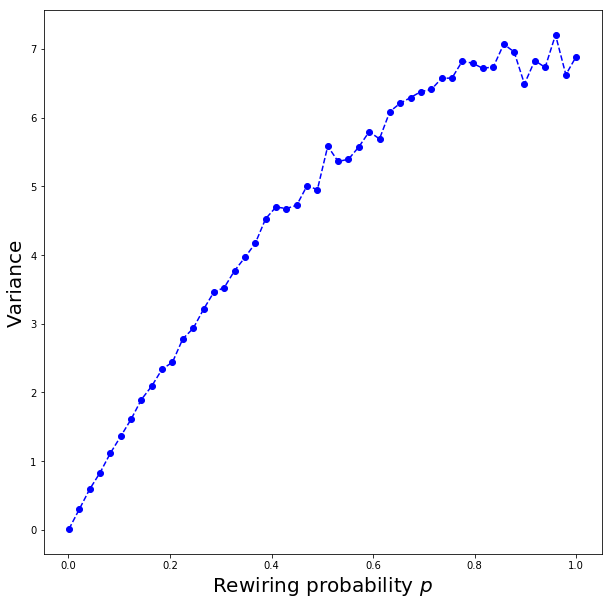

In [50]:
plt.figure(figsize=(10,10))
plt.ylabel('Variance', fontsize=20)
plt.xlabel('Rewiring probability $p$',fontsize=20)
plt.plot(p,mean_second - mean_first**2, 'bo--')
plt.show()

### Plot the degree distribution of the small-world model for $p=0.001$, $p =0.01$ and $p=0.1$.

### Small-world $p=0.0001$

In [17]:
N = 1000
m=5
k = 2*m
p=0.0001
WS_p1 = nx.watts_strogatz_graph(N, k, 0.0001, seed=None)

In [18]:
degree_WS_p1, prob_WS_p1  = degree_distribution(WS_p1)

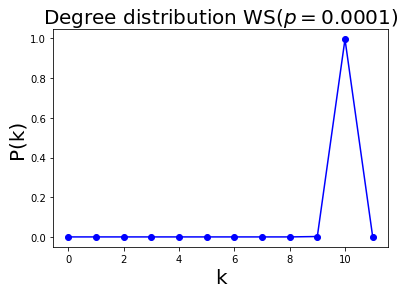

In [19]:
plt.plot(degree_WS_p1,prob_WS_p1,'-bo')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution WS($p=0.0001$)", fontsize=20)
plt.show(True)

### Small-world $p=0.01$

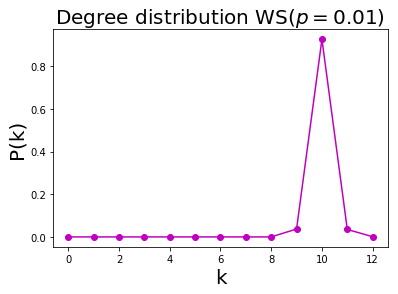

In [20]:
N = 1000
m=5
k = 2*m
p=0.01
WS_p2 = nx.watts_strogatz_graph(N, k, p, seed=None)

degree_WS_p2, prob_WS_p2  = degree_distribution(WS_p2)

plt.plot(degree_WS_p2,prob_WS_p2,'-mo')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution WS($p=0.01$)", fontsize=20)
plt.show(True)

### Small-world $p=0.1$

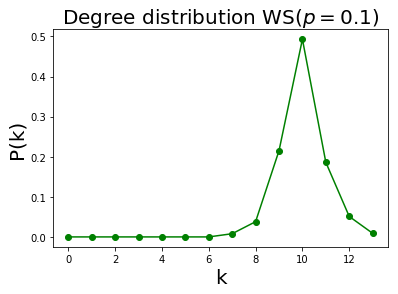

In [21]:
N = 1000
m=5
k = 2*m
p=0.1
WS_p3 = nx.watts_strogatz_graph(N, k, p, seed=None)

degree_WS_p3, prob_WS_p3  = degree_distribution(WS_p3)

plt.plot(degree_WS_p3,prob_WS_p3,'-go')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution WS($p=0.1$)", fontsize=20)
plt.show(True)

### Small-world model for $p=1$

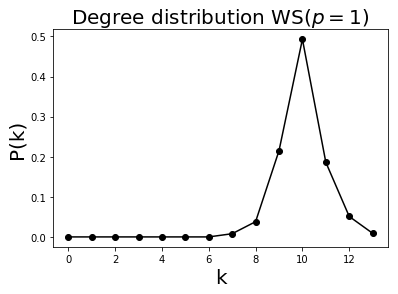

In [23]:
N = 1000
m=5
k = 2*m
p=1
WS_p4 = nx.watts_strogatz_graph(N, k, p, seed=None)

degree_WS_p4, prob_WS_p4  = degree_distribution(WS_p3)

plt.plot(degree_WS_p4,prob_WS_p4,'-ko')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution WS($p=1$)", fontsize=20)
plt.show(True)

The three distribution in the same plot:
    

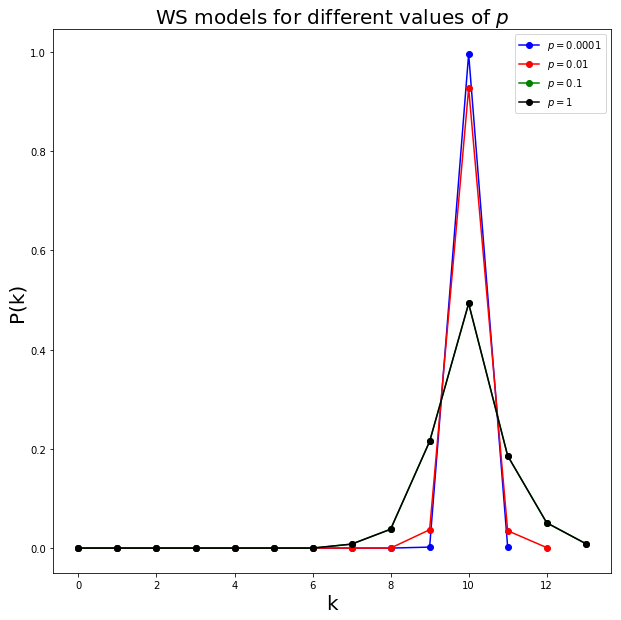

In [26]:
plt.figure(figsize=(10,10))
plt.plot(degree_WS_p1,prob_WS_p1,'-bo')
plt.plot(degree_WS_p2,prob_WS_p2,'-ro')
plt.plot(degree_WS_p3,prob_WS_p3,'-go')
plt.plot(degree_WS_p4,prob_WS_p4,'-ko')
plt.title('WS models for different values of $p$',fontsize=20)
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.legend(('$p=0.0001$','$p=0.01$','$p=0.1$','$p=1$'), loc='upper right')
plt.show(True)


In WS models the distribution become less concentrate when the probability $p$ grows.

### Obtain the following plot in terms of $p$ (consider curves for $p=0$,$p=0.001$, $p=0.01$, $p=0.1$ and $p=1$):

In [13]:
N_step = np.linspace(15,1000,25)

In [79]:
w, h = 30, len(N_step);
small1 = [[0 for x in range(w)] for y in range(h)] 
small2 = [[0 for x in range(w)] for y in range(h)] 
small3 = [[0 for x in range(w)] for y in range(h)] 
small4 = [[0 for x in range(w)] for y in range(h)] 
small5 = [[0 for x in range(w)] for y in range(h)] 

In [80]:
w, h = 30, len(N_step);
diameter1 = [[0 for x in range(w)] for y in range(h)] 
diameter2 = [[0 for x in range(w)] for y in range(h)] 
diameter3 = [[0 for x in range(w)] for y in range(h)] 
diameter4 = [[0 for x in range(w)] for y in range(h)] 
diameter5 = [[0 for x in range(w)] for y in range(h)] 

In [81]:
av_degree = 10
k = int(av_degree)

for i in range(len(N_step)):
    for j in range(len(small1[0])):
        p=0
        small1[i][j] = nx.watts_strogatz_graph(int(N_step[i]), k, p, seed=None)
        diameter1[i][j] = nx.diameter(small1[i][j])
    
        p=0.001
        small2[i][j] = nx.watts_strogatz_graph(int(N_step[i]), k, p, seed=None)
        diameter2[i][j] = nx.diameter(small2[i][j])
    
        p=0.01
        small3[i][j] = nx.watts_strogatz_graph(int(N_step[i]), k, p, seed=None)
        diameter3[i][j] = nx.diameter(small3[i][j])
    
        p=0.1
        small4[i][j] = nx.watts_strogatz_graph(int(N_step[i]), k, p, seed=None)
        diameter4[i][j] = nx.diameter(small4[i][j])
    
    
        p=1
        small5[i][j] = nx.watts_strogatz_graph(int(N_step[i]), k, p, seed=None)
        diameter5[i][j] = nx.diameter(small5[i][j])

In [40]:
import statistics as st

In [54]:
def mean_sim(listoflist):
    aux = np.zeros(len(listoflist))
    for i in range(len(listoflist)):
        aux[i] = mean(listoflist[i])
    return aux

In [82]:
mean_diameter1 = mean_sim(diameter1)
mean_diameter2 = mean_sim(diameter2)
mean_diameter3 = mean_sim(diameter3)
mean_diameter4 = mean_sim(diameter4)
mean_diameter5 = mean_sim(diameter5)

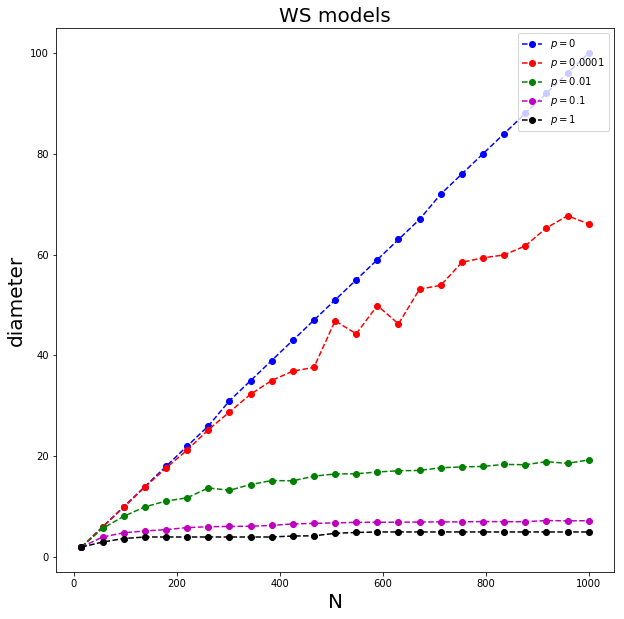

In [87]:
plt.figure(figsize=(10,10))
plt.plot(N_step, mean_diameter1,'--ob')
plt.plot(N_step,mean_diameter2,'--or')
plt.plot(N_step,mean_diameter3,'--og')
plt.plot(N_step,mean_diameter4,'--om')
plt.plot(N_step,mean_diameter5,'--ok')
plt.title('WS models',fontsize=20)
plt.xlabel("N", fontsize=20)
plt.ylabel("diameter", fontsize=20)
plt.legend(('$p=0$','$p=0.0001$','$p=0.01$','$p=0.1$','$p=1$', 'd~N'), loc='upper right')
plt.show(True)

Here we note that for greater values of $p$ the diameter grows slowly.

## Question 4 

### Scale-free network model

- Compare the Barabási-Albert with the configuration model ($\gamma= 3$) in terms of the following measures(construct a table): 

(i) number o nodes, 

(ii) average degree,

(iii) second moment of degree distribution,

(iv) average shortest path length, 

(v) average clustering coefficient,

(vi) transitivity, 

(vii) assortativity coefficient.



**Barabási-Albert network**

In [207]:
N = 1000
av_degree = 8
m = int(av_degree/2)
G_BA = nx.barabasi_albert_graph(N, m)

Now using the degree distribution of the Barabási-Albert network and applying the configuration model

In [213]:
seq = list(dict(G_BA.degree()).values()) ## saving a list of the degree of each node

In [226]:
G_conf = nx.configuration_model(seq)

If the configuration model generate a multigraph and an graph with self edges we have to exclude then for compare with the BA

In [227]:
G_conf = nx.Graph(G_conf)
G_conf.remove_edges_from(G_conf.selfloop_edges())

Now constructing a table for compare the two networks

In [237]:
N1 = len(G_BA.nodes())
N2 = len(G_conf.nodes())

av_degree1 = st.mean(list(dict(G_BA.degree()).values()))
av_degree2 = st.mean(list(dict(G_conf.degree()).values()))

sec_moment1 = momment_of_degree_distribution(G_BA,2)
sec_moment2 = momment_of_degree_distribution(G_conf,2)

av_short_path1 = nx.average_shortest_path_length(G_BA)
av_short_path2 = nx.average_shortest_path_length(G_conf)


av_clust_coeff1 = nx.average_clustering(G_BA)
av_clust_coeff2 = nx.average_clustering(G_conf)


transitivity1 = nx.transitivity(G_BA)
transitivity2 = nx.transitivity(G_conf)
        
assor_coeff1 = nx.degree_assortativity_coefficient(G_BA)
assor_coeff2 = nx.degree_assortativity_coefficient(G_conf)

In [241]:
measures_BA1 = [N1,av_degree1,sec_moment1,av_short_path1,av_clust_coeff1,transitivity1,assor_coeff1]
measures_conf = [N2,av_degree2,sec_moment2,av_short_path2,av_clust_coeff2,transitivity2,assor_coeff2]

In [242]:
df = pd.DataFrame(columns=['Model','N','Mean degree', 'Second Moment', 'Ave Shor Path', 'Av. Clus Coeff', 'Transitivity', 'Assortativity'])

In [247]:
df.loc[1] = ['BA'] + (measures_BA1)
df.loc[2] = ['BA with conf'] + (measures_conf)

In [248]:
df.style

,Model,N,Mean degree,Second Moment,Ave Shor Path,Av. Clus Coeff,Transitivity,Assortativity
1,BA,1000,7.968,153.044,3.13553,0.0403704,0.0257244,-0.0751228
2,BA with conf,1000,7.794,134.404,3.2443,0.0342082,0.030898,-0.030965


### Non linear Barabási-Albert

Using the igraph package, generate networks according the non-linear Barabási model

https://igraph.org/c/doc/igraph-Generators.html#igraph_barabasi_game
Obtain	this	curve	and	discuss	the	results	(t	is	the	number	of	steps in	the	model,	network	size):

For	alpha	=	0.5,	1	and	1.5	and	2,5,	obtain	the	table:

(i)	number	o	nodes,

(ii)	average	degree,

(iii)	second	moment	of	degree	
distribution,	

(iv)	average	shortest	path	length,

(v)	average	clustering coefficient,	

(vi)	transitivity,	

(vii)	assortativity coefficient.

## Question 5

### Classification of networks

Choose three networks and perform the classification. Show the results by using the PCA. For example (real network represented by X)

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### First, creating functions to make the dataframe

In [63]:
def network_measures(G):
    N = len(G) ## Number of nodes
    av_degree = st.mean(list(dict(G.degree()).values())) ## First moment
    sec_moment = momment_of_degree_distribution(G,2) ## Second moment
    short_path = nx.average_shortest_path_length(G) ## Average shortest path
    av_CC = nx.average_clustering(G) ## Average clustering coefficient
    trans = nx.transitivity(G)   ## Transitivity
    assor_coef=nx.degree_assortativity_coefficient(G) ## Assortativity
    
    return N,av_degree,sec_moment,short_path,av_CC,trans,assor_coef

In [170]:
def create_networks(N,av_degree):
    ER_Nets = [None]*15
    BA_Nets = [None]*15
    WS_Nets1 = [None]*15
    
    data_networks = []

    for i in range(15):
        ER_Nets[i] = nx.gnp_random_graph(N,av_degree/(N-1))
        Sub=sorted(nx.connected_component_subgraphs(ER_Nets[i]), key = len, reverse=True)
        ER_Nets[i]=Sub[0]
        data_networks.append(network_measures(ER_Nets[i]))
        
    for i in range(15):
        BA_Nets[i] = nx.barabasi_albert_graph(N,round(av_degree/2))
        data_networks.append(network_measures(BA_Nets[i]))
        
        
    for i in range(15):
        WS_Nets1[i] = nx.watts_strogatz_graph(N,round(av_degree),0.1)
        data_networks.append(network_measures(WS_Nets1[i]))
        
    return(data_networks)

### We choose the "netscience" network, "Political books network (2004)" and the "Word adjacencies of David Copperfield".

**Netscience**

In [196]:
netscience = nx.read_gml("netscience.gml")
Sub=sorted(nx.connected_component_subgraphs(netscience), key = len, reverse=True)
netscience=Sub[0]
netscience = nx.convert_node_labels_to_integers(netscience, first_label=0)


In [201]:
netscience_measures = network_measures(netscience)

In [199]:
N_net = len(netscience.nodes())
Av_degree = st.mean(list(dict(netscience.degree()).values()))

In [200]:
data_net = create_networks(N_net,Av_degree)

In [206]:
data_net.append(netscience_measures)

In [208]:
df_datanet = pd.DataFrame(data_net)

In [212]:
scaler = StandardScaler()
scaler.fit(df_datanet)
df_datanet = scaler.transform(df_datanet) 

In [213]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_datanet)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

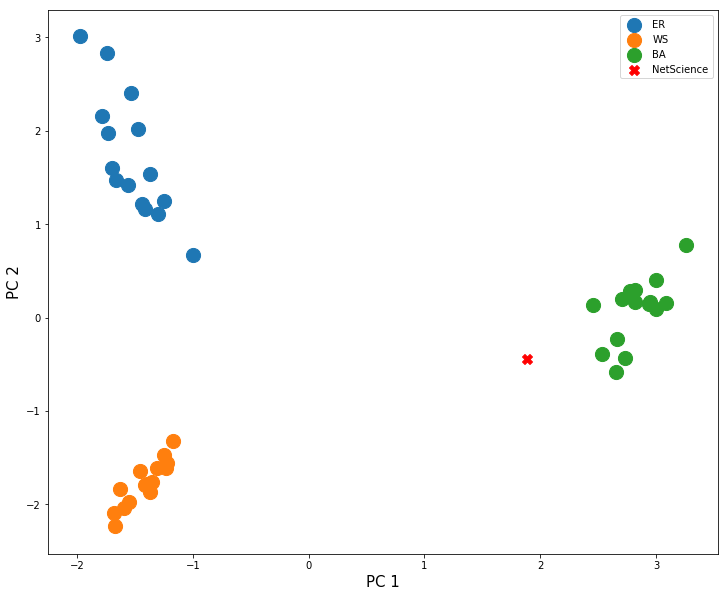

In [219]:
plt.figure(figsize=(12,10))
plt.xlabel("PC 1",fontsize=15)
plt.ylabel("PC 2",fontsize=15)

PC1_ER = principalDf[0:15].PC1; PC2_ER = principalDf[0:15].PC2
plt.scatter(x=PC1_ER, y=PC2_ER,label = "ER",s=200)

PC1_WS = principalDf[15:30].PC1; PC2_WS = principalDf[15:30].PC2
plt.scatter(x=PC1_WS, y=PC2_WS,label = "WS",s=200)

PC1_BA = principalDf[30:45].PC1; PC2_BA = principalDf[30:45].PC2
plt.scatter(x=PC1_BA, y=PC2_BA,label = "BA",s=200)

plt.scatter(x=principalDf.PC1[45], y=principalDf.PC2[45], marker='X',label = "NetScience",s=100,c="red")
plt.legend()

Here we can see the network of scientist in complex networks is similar to Barabasi-Albert networks.

**Powergrid**

In [225]:
polbooks = nx.read_gml("polbooks.gml",label='id')
Sub=sorted(nx.connected_component_subgraphs(polbooks), key = len, reverse=True)
polbooks=Sub[0]
polbooks = nx.convert_node_labels_to_integers(polbooks, first_label=0)
polbooks = polbooks.to_undirected()

In [228]:
polbooks_measures = network_measures(polbooks)

In [229]:
N_pol = len(polbooks.nodes())
Av_degree_pol = st.mean(list(dict(polbooks.degree()).values()))

In [231]:
data_pol = create_networks(N_pol, Av_degree_pol)

In [238]:
data_pol.append(polbooks_measures)

df_pol = pd.DataFrame(data_pol)

In [243]:
scaler = StandardScaler()
scaler.fit(df_pol)
df_datanet = scaler.transform(df_pol) 

C:\Users\Gulherme\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Gulherme\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


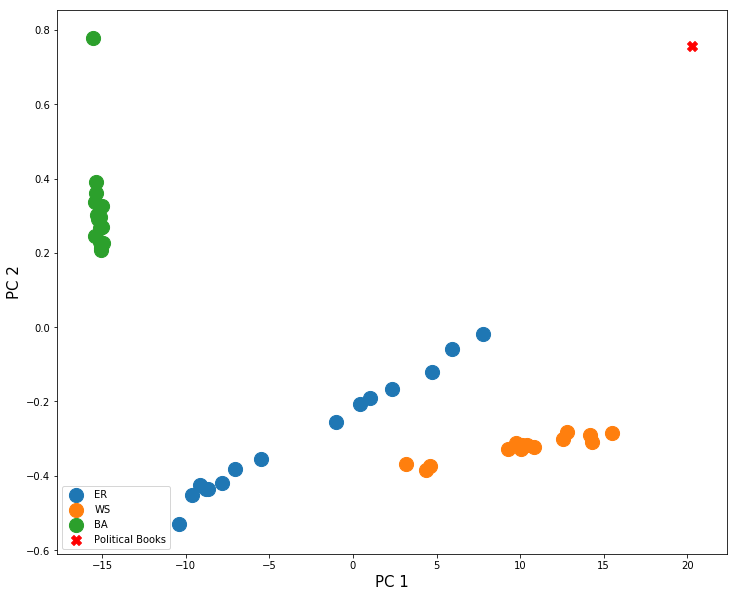

In [244]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_pol)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

plt.figure(figsize=(12,10))
plt.xlabel("PC 1",fontsize=15)
plt.ylabel("PC 2",fontsize=15)

PC1_ER = principalDf[0:15].PC1; PC2_ER = principalDf[0:15].PC2
plt.scatter(x=PC1_ER, y=PC2_ER,label = "ER",s=200)

PC1_WS = principalDf[15:30].PC1; PC2_WS = principalDf[15:30].PC2
plt.scatter(x=PC1_WS, y=PC2_WS,label = "WS",s=200)

PC1_BA = principalDf[30:45].PC1; PC2_BA = principalDf[30:45].PC2
plt.scatter(x=PC1_BA, y=PC2_BA,label = "BA",s=200)

plt.scatter(x=principalDf.PC1[45], y=principalDf.PC2[45], marker='X',label = "Political Books",s=100,c="red")
plt.legend()

Here, political book cannot be classified by any of the considered models.

**Rdependency**

In [253]:
adj = nx.read_gml("adjnoun.gml",label='id')
Sub=sorted(nx.connected_component_subgraphs(adj), key = len, reverse=True)
adj=Sub[0]
adj = nx.convert_node_labels_to_integers(adj, first_label=0)
adj = adj.to_undirected()

In [254]:
adj_measures = network_measures(adj)

In [255]:
N_adj = len(adj.nodes())
Av_degree_adj = st.mean(list(dict(adj.degree()).values()))

In [256]:
data_adj = create_networks(N_adj,Av_degree_adj)

In [257]:
len(data_adj)

45

C:\Users\Gulherme\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Gulherme\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


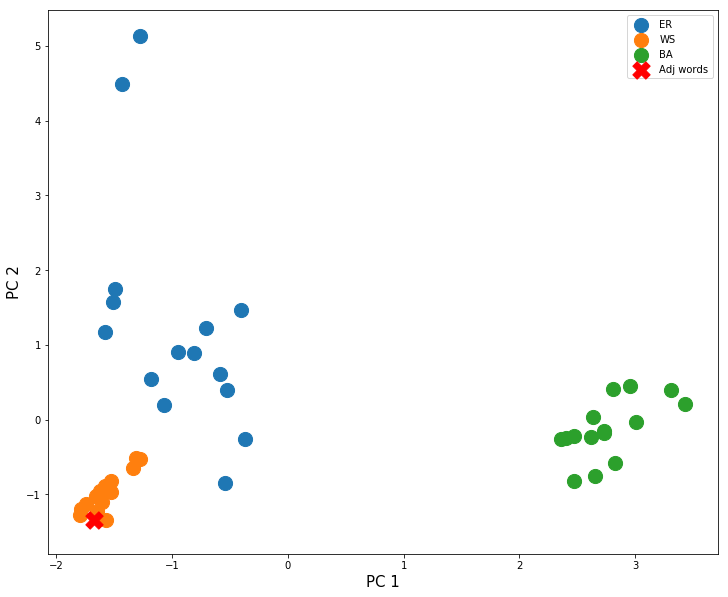

In [259]:
data_adj.append(adj_measures)

df_adj = pd.DataFrame(data_adj)

scaler = StandardScaler()
scaler.fit(df_adj)
df_adj = scaler.transform(df_adj) 

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_adj)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

plt.figure(figsize=(12,10))
plt.xlabel("PC 1",fontsize=15)
plt.ylabel("PC 2",fontsize=15)

PC1_ER = principalDf[0:15].PC1; PC2_ER = principalDf[0:15].PC2
plt.scatter(x=PC1_ER, y=PC2_ER,label = "ER",s=200)

PC1_WS = principalDf[15:30].PC1; PC2_WS = principalDf[15:30].PC2
plt.scatter(x=PC1_WS, y=PC2_WS,label = "WS",s=200)

PC1_BA = principalDf[30:45].PC1; PC2_BA = principalDf[30:45].PC2
plt.scatter(x=PC1_BA, y=PC2_BA,label = "BA",s=200)

plt.scatter(x=principalDf.PC1[45], y=principalDf.PC2[45], marker='X',label = "Adj words",s=300,c="red")
plt.legend()

Here, we can say the _Word adjacencies_ can be classify as a Small-World network.

### References

[1] Lecture notes, Dynamical processes in complex networks

[2] Network Science Book, http://networksciencebook.com/

[3] Small World Networks, https://mathinsight.org/small_world_network

[4] Evolution and Structure of the Internet, A Statisical Physics Approach, Romualdo Pastor-Satorras, Alessandro Vespignani

[5] Dynamical Processes on Complex Networks, Alain Barrat, Marc Barthélemy, Alessandro Vespignani